In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

from timeit import default_timer as timer
import math
from decimal import Decimal

from igraph import *

<h2>Helper functions:</h2>


In [2]:
'''
def genAdj(v,e,deb=False):
    #we will fill only top-side triangle of adjacency matrix
    #possible edges
    k=int(v*(v-1)/2)
    #min edges to get a connected graph
    c=int(v-1)
    #we should choose e edges from k-c possible edges
    edges=np.zeros(k-c, dtype=int)
    edgesChoice=np.random.choice(k-c,e,replace=False)
    edges[edgesChoice]=1

    adj=[]
    curPos=0
    for i in range(v-1):
        curRange=v-i-2
        toAdj=edges[curPos:curPos+curRange]
        #insert guaranteed edge
        o=0
        if(curRange!=0):
            o=np.random.randint(0,curRange)

        toAdj=np.concatenate([np.array([0]*(i+1)),toAdj[:o],[1],toAdj[o:]])
        
        curPos+=curRange
        adj.append(toAdj)
    
    adj.append([0]*v)

    adj=np.array(adj,dtype=int)
    adj=np.transpose(adj)+adj

    return adj
'''
def genAdj(v,e,deb=False):
    #we will fill only top-side triangle of adjacency matrix
    #possible edges
    k=int(v*(v-1)/2)
    #from previous alg
    c=int(v-1)
    #we should choose e edges from k-c possible edges
    edges=np.zeros(k-c, dtype=int)
    edgesChoice=np.random.choice(k-c,e,replace=False)
    edges[edgesChoice]=1

    adj=[]
    curPos=0
    for i in range(v-1):
        curRange=v-i-2
        toAdj=edges[curPos:curPos+curRange]
        #I noticed it to late that it shouldn't be a connected graph :(
        o=0
        if(curRange!=0):
            o=np.random.randint(0,curRange)

        toAdj=np.concatenate([np.array([0]*(i+1)),toAdj[:o],[np.random.randint(0,1)],toAdj[o:]])
        
        curPos+=curRange
        adj.append(toAdj)
    
    adj.append([0]*v)

    adj=np.array(adj,dtype=int)
    adj=np.transpose(adj)+adj

    return adj
def printGraph(g):
    layout = g.layout("kk")
    fig, ax = plt.subplots()
    plot(g, layout=layout, target=ax)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
...
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

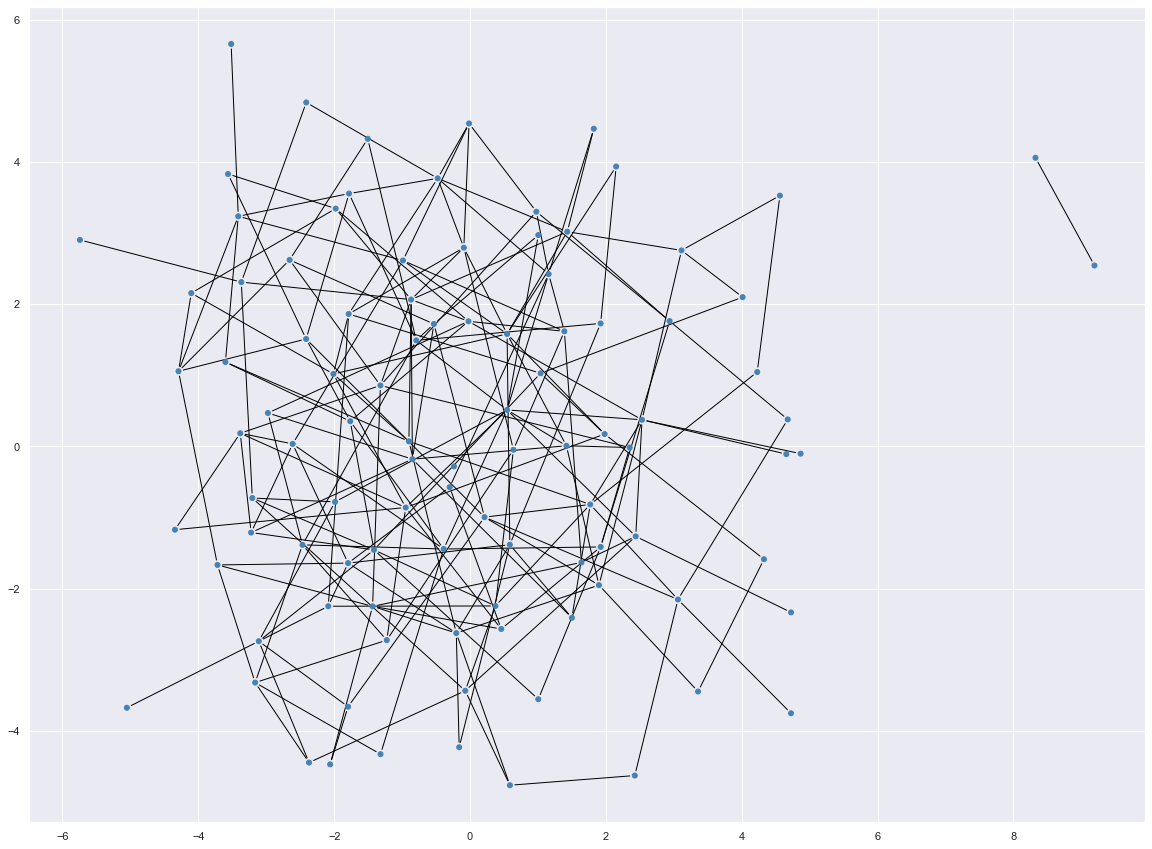

In [151]:
adj=genAdj(100,200)

for i in range(0,3):
    print(adj[i])
print("...")
for i in range(0,3):
    print(adj[100-3+i])


g=Graph.Adjacency((adj>0).tolist(),mode="undirected")
print(g.summary())
printGraph(g)

adj_list=g.get_adjlist()

for i in range(0,3):
    print(adj_list[i])
print("...")
for i in range(0,3):
    print(adj_list[100-3+i])



In [152]:
#number of connected components of the graph
cl=g.clusters()
print(cl.summary())

Clustering with 100 elements and 3 clusters


In [149]:
#from https://www.geeksforgeeks.org/connected-components-in-an-undirected-graph/
def dfs(adj):
    V=len(adj)
    visited = [False]*V
    connected = []
    for k in range(V):
        if visited[k] == False:
            temp = []

            dfsTraversal(temp, k, visited,adj)
            connected.append(temp)
    return connected

def dfsTraversal(temp, k, visited,adj):
    visited[k] = True

    # Add vertex to current path
    temp.append(k)

    # For every adjacent vertex
    for i in adj[k]:
        if visited[i] == False:
            # Update the list
            dfsTraversal(temp, i, visited,adj)

In [161]:
dfsResult=dfs(adj_list)
print(dfsResult)
print("connected components: ",len(dfs(adj_list)))

[[0, 12, 20, 48, 13, 7, 21, 30, 10, 70, 5, 45, 49, 40, 1, 3, 9, 16, 22, 18, 60, 2, 15, 58, 61, 4, 62, 36, 46, 38, 27, 47, 37, 76, 65, 25, 82, 57, 56, 53, 23, 54, 26, 85, 32, 8, 73, 63, 83, 75, 86, 87, 99, 41, 31, 24, 33, 92, 93, 69, 29, 35, 68, 52, 17, 14, 59, 42, 66, 90, 94, 11, 55, 67, 50, 89, 96, 80, 98, 28, 51, 88, 71, 97, 95, 72, 81, 19, 77, 34, 74, 78, 91, 43, 84, 39, 64], [6, 44], [79]]
connected components:  3


In [163]:
print("Number of vertices in connected component:")
k=0
for i in dfsResult:
        k+=len(i)
        print(f"{i}: ",len(i))
print("total: ",k)

Number of vertices in connected component:
[0, 12, 20, 48, 13, 7, 21, 30, 10, 70, 5, 45, 49, 40, 1, 3, 9, 16, 22, 18, 60, 2, 15, 58, 61, 4, 62, 36, 46, 38, 27, 47, 37, 76, 65, 25, 82, 57, 56, 53, 23, 54, 26, 85, 32, 8, 73, 63, 83, 75, 86, 87, 99, 41, 31, 24, 33, 92, 93, 69, 29, 35, 68, 52, 17, 14, 59, 42, 66, 90, 94, 11, 55, 67, 50, 89, 96, 80, 98, 28, 51, 88, 71, 97, 95, 72, 81, 19, 77, 34, 74, 78, 91, 43, 84, 39, 64]:  97
[6, 44]:  2
[79]:  1
total:  100


In [15]:
#from https://stackoverflow.com/a/8922151
def bfs(graph, start, end):
    # maintain a queue of paths
    queue = []
    # push the first path into the queue
    queue.append([start])
    while queue:
        # get the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        # path found
        if node == end:
            return path
        # enumerate all adjacent nodes, construct a 
        # new path and push it into the queue
        for adjacent in graph[node]:
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)

In [154]:
fr=np.random.randint(0,99)
to=np.random.randint(0,99)
print(f"Path from {fr} to {to}:")
print("bfs: ",bfs(adj_list,fr,to))
print("to prove: ",g.get_shortest_paths(fr,to))

Path from 57 to 50:
bfs:  [57, 94, 67, 50]
to prove:  [[57, 94, 67, 50]]


In [156]:
fr=79
to=np.random.randint(0,99)
print(f"Path from {fr} to {to}:")
print("bfs: ",bfs(adj_list,fr,to))
print("to prove: ",g.get_shortest_paths(fr,to))

Path from 79 to 57:
bfs:  None
to prove:  [[]]


C:\Users\Oleg\AppData\Local\Temp/ipykernel_2928/3919186921.py:5: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:367
  print("to prove: ",g.get_shortest_paths(fr,to))
